# 1. Single Variable Regression

In [81]:
from pylab import *
%matplotlib inline
from sklearn.cross_validation import KFold
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression

###Function to load the data from a given file into numpy arrays

In [82]:
def getData(fileName):
    strData=[]
    with open(fileName,'r') as f:
        for line in f:
            if line.strip().find('#'):
                strData.append(line.strip().split(" "))
    data = np.array(strData, dtype='|S25').astype(np.float64)
    return data

###Function to calculate Mean Square Error (MSE)

In [97]:
def calcErr(Y_est, Y):
    m = len(Y)
    err=np.zeros(m)
    Yavg = np.mean(Y)
    for i in range(m):
        err[i] = ((Y_est[i] - Y[i])**2)/m 
    return np.sum(err)/m    

###Function to fit a linear model to the given dataset and plot the test data with regression line

In [95]:
def linear_fit(data, train_idx, test_idx, ax):
    training_data = data[train_idx]
    test_data = data[test_idx]
      
    m_train = len(training_data)
    X_train = training_data[:,0].reshape((m_train,1))
    Y_train = training_data[:,1].reshape((m_train,1))
        
    m_test = len(test_data)
    X_test = test_data[:,0].reshape((m_test,1))
    Y_test = test_data[:,1].reshape((m_test,1))

    mode=0
    if mode==1:
        sumX=sum(X_train)
        sumY=sum(Y_train)
        XY=np.multiply(X_train, Y_train)
        sumXY=sum(XY)
        Xsquare=np.square(X_train)
        sumXsquare=sum(Xsquare)
        A=np.array([[m_train, sumX],[sumX, sumXsquare]])
        b=np.array([[sumY],[sumXY]])
        theta = solve(A,b)
        Y_train_est = theta[0] + theta[1]*X_train
        Y_test_est = theta[0] + theta[1]*X_test
        
    if mode==0:
        Z_train = np.hstack((np.ones_like(X_train),X_train))
        theta = np.dot(np.linalg.pinv(Z_train),Y_train)
        Z_test = np.hstack((np.ones_like(X_test),X_test))
        Y_train_est = np.dot(Z_train, theta)
        Y_test_est = np.dot(Z_test, theta)
    
    
    err_train = calcErr(Y_train_est,Y_train)
    err_test = calcErr(Y_test_est,Y_test)
    
    ax.set_title('Linear Model Fit')
    ax.set_xlim(min(X_test), max(X_test))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.scatter(X_test, Y_test, marker='o')
    ax.plot(X_test, Y_test_est)
    
    err = [err_train, err_test]
    
    return err

###Function to perform linear fit using Python library

In [85]:
def lm_fit(data, train_idx, test_idx):
    training_data = data[train_idx]
    test_data = data[test_idx]
     
    m_train = len(training_data)
    X_train = training_data[:,0].reshape((m_train,1))
    Y_train = training_data[:,1].reshape((m_train,1))
        
    m_test = len(test_data)
    X_test = test_data[:,0].reshape((m_test,1))
    Y_test = test_data[:,1].reshape((m_test,1))
        
    lm = LinearRegression()
    lm.fit(X_train,Y_train)
        
    Y_train_est = lm.predict(X_train)
    Y_test_est = lm.predict(X_test)
        
    err_train = calcErr(Y_train_est,Y_train)
    err_test = calcErr(Y_test_est,Y_test)
    
    err = [err_train, err_test]
    
    return err

###Function to fit a polynomial model on the dataset and plot the data

In [92]:
def poly_fit(data, train_idx, test_idx, degree, ax):
    training_data = data[train_idx]
    test_data = data[test_idx]
     
    m_train = len(training_data)
    X_train = training_data[:,0].reshape((m_train,1))
    Y_train = training_data[:,1].reshape((m_train,1))
        
    m_test = len(test_data)
    X_test = test_data[:,0].reshape((m_test,1))
    Y_test = test_data[:,1].reshape((m_test,1))
    
    poly = PolynomialFeatures(degree)
    Z_train = poly.fit_transform(X_train)
    theta = np.dot(np.linalg.pinv(Z_train),Y_train)
    
    Y_train_est = np.dot(Z_train, theta)
    
    Z_test = poly.fit_transform(X_test)
    Y_test_est = np.dot(Z_test, theta)
    
    err_train = calcErr(Y_train_est,Y_train)
    err_test = calcErr(Y_test_est,Y_test)
    
    ax.set_title('Polonomial Model Fit')
    ax.set_xlim(min(X_test), max(X_test))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.scatter(X_test, Y_test, marker='o')
    ax.plot(X_test, Y_test_est)
    err = [err_train, err_test]
    
    return err

###Function to fit a polynomial model using Python library functions

In [87]:
def poly_lm_fit(data, train_idx, test_idx, degree):
    training_data = data[train_idx]
    test_data = data[test_idx]
     
    m_train = len(training_data)
    X_train = training_data[:,0].reshape((m_train,1))
    Y_train = training_data[:,1].reshape((m_train,1))
        
    m_test = len(test_data)
    X_test = test_data[:,0].reshape((m_test,1))
    Y_test = test_data[:,1].reshape((m_test,1))
    
    poly = PolynomialFeatures(degree)
    Z_train = poly.fit_transform(X_train)
    
    lm = LinearRegression()
    lm.fit(Z_train,Y_train)    
    Y_train_est = lm.predict(Z_train)
    
    Z_test = poly.fit_transform(X_test)
    Y_test_est = lm.predict(Z_test)
    
    err_train = calcErr(Y_train_est,Y_train)
    err_test = calcErr(Y_test_est,Y_test)
    
    err = [err_train, err_test]
    
    return err

###Function to load real datasets

In [99]:
def getRealData():
    from sklearn import datasets
    data = datasets.load_boston() 
    #data = datasets.load_diabetes()
    X = data['data']
    Y = data['target']
    Y = Y.reshape(len(data['target']), 1)
    dataset = np.hstack((X, Y))
    return dataset

###The master funtion that invokes all previous functions to perform Single Variable Regression

In [104]:
def run(fileName, K, degree):
    
    if fileName=='real':
        dataset = getRealData()
    else:
        dataset = getData(fileName)
    
    #K = 2
    #degree = 4
    #Slicing to use reduced data
    #dataset = dataset[0:500]
    
    fig=plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Single Variable Dataset')
    ax.set_xlim(min(dataset[:,0]), max(dataset[:,0]))
    ax.set_ylim(min(dataset[:,1]), max(dataset[:,1]))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.scatter(dataset[:,0], dataset[:,1], marker='o')
        

    
    CV_idx = KFold(len(dataset), n_folds=K)
    err_train = np.zeros(K)
    err_test = np.zeros(K)
    err_poly_train = np.zeros(K)
    err_poly_test = np.zeros(K)
    err_lm_train = np.zeros(K)
    err_lm_test = np.zeros(K)
    err_poly_lm_train = np.zeros(K)
    err_poly_lm_test = np.zeros(K)
    
    i = 0
    j = 1
    fig2 = plt.figure(figsize=(15,25))
    for train_idx, test_idx in CV_idx:
        ax = fig2.add_subplot(K,2,j)
        j+=1
        [err_train[i], err_test[i]] = linear_fit(dataset, train_idx, test_idx, ax)
        [err_lm_train[i], err_lm_test[i]] = lm_fit(dataset, train_idx, test_idx)
        ax = fig2.add_subplot(K,2,j)
        j+=1
        [err_poly_train[i], err_poly_test[i]] = poly_fit(dataset, train_idx, test_idx, degree, ax)
        [err_poly_lm_train[i], err_poly_lm_test[i]] = poly_lm_fit(dataset, train_idx, test_idx, degree)
        i+=1 
        
    print "\t\t\t\t\t\t<Training Error> <Test Error>"
    print "Linear Model Implementation Errors: \t\t", np.mean(err_train), np.mean(err_test)
    print "Python LM Errors: \t\t\t\t", np.mean(err_lm_train), np.mean(err_lm_test)
    print "Polynomial Model Implementation Errors: \t", np.mean(err_poly_train), np.mean(err_poly_test)
    print "Python Polynomial Model Errors: \t\t", np.mean(err_poly_lm_train), np.mean(err_poly_lm_test)



###Main function that call the master function to perform variations of the Single Variable Regression

						<Training Error> <Test Error>
Linear Model Implementation Errors: 		0.0234749593424 0.218437628237
Python LM Errors: 				0.0234749593424 0.218437628237
Polynomial Model Implementation Errors: 	0.0228582404076 0.223859204995
Python Polynomial Model Errors: 		0.0228582404076 0.223859204991


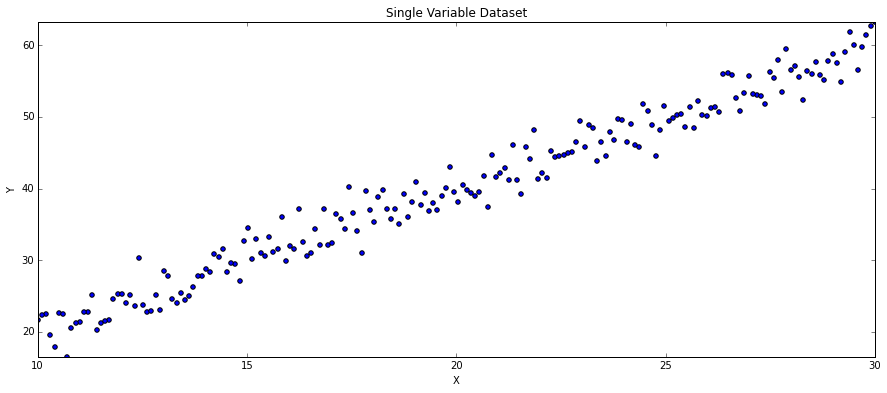

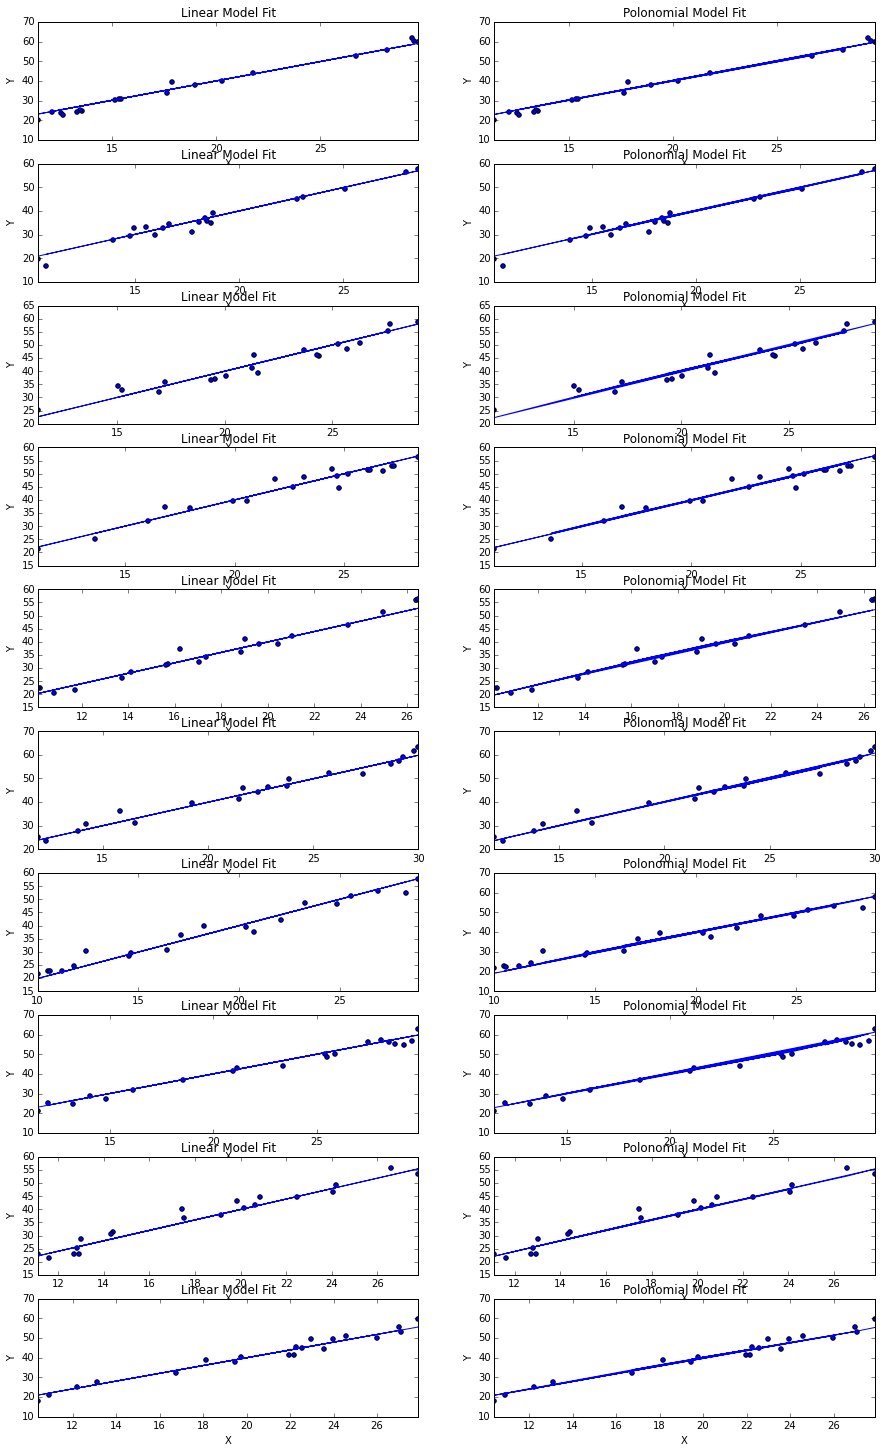

In [105]:
def main():
    fileName='svar-set1.dat'
    run(fileName, K=10, degree = 4)
        
if __name__ == '__main__':
    main()